<a href="https://colab.research.google.com/github/Sireesha-cloud/Sireesha_INFO5731_Fall2024/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
!pip install pandas scikit-learn nltk bertopic sentence-transformers umap-learn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from nltk.corpus import stopwords
import nltk
from bertopic import BERTopic
import os

# Download stopwords if not already available
nltk.download('stopwords')

# Ensure the file exists
file_path = "/content/cleaned_amazon_reviews (3).csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file at {file_path} was not found.")

# Load the dataset
df = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if necessary
documents = df['Cleaned_Text_Stemmed'].dropna().tolist()

# Preprocessing: stopwords
stop_words = set(stopwords.words('english'))  # Use NLTK stopwords
stop_words = list(stop_words)  # Convert to list for compatibility

# 1. CountVectorizer for LDA (Latent Dirichlet Allocation)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
count_dtm = count_vectorizer.fit_transform(documents)

# 2. TF-IDF Vectorizer for LSA (Latent Semantic Analysis)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
tfidf_dtm = tfidf_vectorizer.fit_transform(documents)

# 3. Train LDA Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(count_dtm)

# Extract topics from LDA
lda_topics = []
feature_names = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    lda_topics.append(keywords)

# 4. Train LSA Model (TruncatedSVD)
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(tfidf_dtm)

# Extract topics from LSA
lsa_topics = []
feature_names = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lsa_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    lsa_topics.append(keywords)

# 5. Train BERTopic
bertopic_model = BERTopic()
bertopic_topics, _ = bertopic_model.fit_transform(documents)

# 6. Output Results
print("\nLDA Topics (Top 10 Keywords per Topic):")
for i, topic in enumerate(lda_topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

print("\nLSA Topics (Top 10 Keywords per Topic):")
for i, topic in enumerate(lsa_topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

print("\nBERTopic Clusters (Top 10 Topics):")
for i in range(10):
    topic = bertopic_model.get_topic(i)
    if topic:
        print(f"Topic {i+1}: {', '.join([word for word, _ in topic])}")

# 7. Summarize Topics
print("\nTopic Summaries:")
print("LDA: Topics tend to focus on co-occurring words and common patterns.")
print("LSA: Topics are based on singular value decomposition, capturing semantic structures.")
print("BERTopic: Topics are generated using transformer-based embeddings and clustering.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


LDA Topics (Top 10 Keywords per Topic):
Topic 1: samsung, good, want, instal, need, travel, physic, alot, money, afford
Topic 2: samsung, without, experi, detail, ultra, video, devic, use, smartphon, power
Topic 3: de, en, ño, sin, la, samsung, galaxi, tambi, cargador, da
Topic 4: de, la, vien, tarjeta, regalo, samsung, good, want, travel, alot
Topic 5: para, equipo, es, su, el, sellado, con, origin, nimo, funciona
Topic 6: batteri, phone, good, samsung, want, life, great, price, get, deal
Topic 7: realli, phone, use, like, camera, featur, display, usag, nice, devic
Topic 8: samsung, good, want, instal, need, travel, physic, alot, money, afford
Topic 9: phone, also, ultra, came, new, im, screen, condit, featur, pic
Topic 10: muy, fono, tel, buen, samsung, good, want, save, need, alot

LSA Topics (Top 10 Keywords per Topic):
Topic 1: phone, realli, samsung, use, batteri, also, great, want, get, ultra
Topic 2: de, la, regalo, tarjeta, vien, ño, en, para, es, equipo
Topic 3: buen, tel, f

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Load the dataset
file_path = "/content/sentiment_analysis_data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Check column names to find the sentiment and text columns
print("Columns in the dataset:", df.columns)

# Assuming the sentiment column is 'sentiment' and text column is 'text'
# Ensure the column names are correct
documents = df['Review_Text'].dropna().tolist()
sentiments = df['Sentiment'].dropna().tolist()

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(documents, sentiments, test_size=0.2, random_state=42)

# Feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize classifiers
logreg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)

# Cross-validation (5-fold) for both models
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_cv_scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=cv, scoring='accuracy')
svm_cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=cv, scoring='accuracy')

print(f"Logistic Regression Cross-Validation Accuracy: {logreg_cv_scores.mean():.4f}")
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.4f}")

# Train models on the full training set
logreg.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)

# Predict on the test set
logreg_pred = logreg.predict(X_test_tfidf)
svm_pred = svm.predict(X_test_tfidf)

# Evaluate performance using accuracy, precision, recall, and F1 score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

print("\nLogistic Regression Performance:")
evaluate_model(y_test, logreg_pred)

print("\nSVM Performance:")
evaluate_model(y_test, svm_pred)


Columns in the dataset: Index(['Review_Text', 'Sentiment'], dtype='object')
Logistic Regression Cross-Validation Accuracy: 1.0000
SVM Cross-Validation Accuracy: 1.0000

Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        22
    positive       1.00      1.00      1.00       178

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


SVM Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        22
    positive       1.00      1.00      1.00       178

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

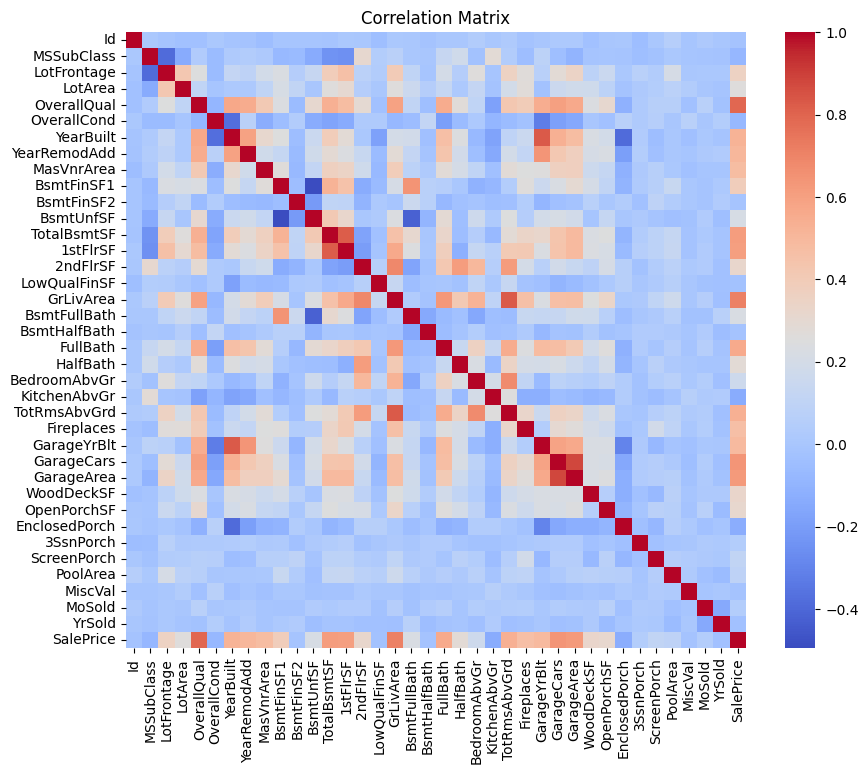


Model Performance:
Train RMSE: 37785.10531612486
Validation RMSE: 39558.88050828616
Validation R²: 0.795979338453358

Predictions saved to 'submission.csv'


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Step 1: EDA - Basic Info and Missing Values
print("Training Data Info:")
print(train_data.info())

# Check missing values
missing_train = train_data.isnull().mean() * 100
print("\nColumns with missing values in training data:")
print(missing_train[missing_train > 0].sort_values(ascending=False))

# Filter for numerical features to calculate correlations
numerical_columns = train_data.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical features
correlation_matrix = numerical_columns.corr()

# Extract correlations with `SalePrice` and sort them
saleprice_corr = correlation_matrix["SalePrice"].sort_values(ascending=False)
print("\nTop 10 features most correlated with SalePrice:")
print(saleprice_corr.head(10))

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Step 2: Data Cleaning - Handle Missing Values
# Drop columns with significant missing data
cols_to_drop = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

# Impute missing values for numerical columns
train_data["LotFrontage"].fillna(train_data["LotFrontage"].median(), inplace=True)
test_data["LotFrontage"].fillna(test_data["LotFrontage"].median(), inplace=True)

train_data["GarageYrBlt"].fillna(0, inplace=True)
test_data["GarageYrBlt"].fillna(0, inplace=True)

# Fill missing categorical values with mode
for col in train_data.select_dtypes(include="object").columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    if col in test_data.columns:
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Step 3: Feature Selection
selected_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"]
X = train_data[selected_features]
y = train_data["SalePrice"]

# Apply the same feature selection to the test data
X_test = test_data[selected_features]

# Step 4: Split the Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build Regression Model
# Linear Regression Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Scale numerical data
    ("model", LinearRegression())  # Regression model
])

pipeline.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)

print("\nModel Performance:")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val))}")
print(f"Validation R²: {r2_score(y_val, y_pred_val)}")

# Step 7: Predict on Test Set (Updated to Handle Missing Values in Test Set)
# Ensure no missing values in X_test
for col in X_test.columns:
    if X_test[col].isnull().any():
        # Use median for numerical features with missing values
        if X_test[col].dtype in ['float64', 'int64']:
            X_test[col].fillna(X_test[col].median(), inplace=True)
        # Use mode for categorical features (if applicable)
        else:
            X_test[col].fillna(X_test[col].mode()[0], inplace=True)

# Predict on the test set after handling missing values
test_data["PredictedSalePrice"] = pipeline.predict(X_test)

# Save predictions to CSV
test_data[["Id", "PredictedSalePrice"]].to_csv("submission.csv", index=False)
print("\nPredictions saved to 'submission.csv'")


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [3]:
!pip install transformers scikit-learn pandas
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
new_file_path = '/content/cleaned_amazon_reviews (3).csv'  # Update with the correct path
new_data = pd.read_csv(new_file_path, encoding='ISO-8859-1')

# Mapping ratings to sentiment labels (positive for ratings 4 and 5, negative for ratings 1 and 2)
def map_rating_to_sentiment(rating):
    if float(rating.split()[0]) >= 4:
        return 'positive'
    else:
        return 'negative'

# Apply the mapping to the 'Rating' column
new_data['Sentiment'] = new_data['Rating'].apply(map_rating_to_sentiment)

# Initialize the RoBERTa sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="roberta-base")

# Perform sentiment analysis using the lemmatized text
new_data['Predicted_Sentiment'] = new_data['Cleaned_Text_Lemmatized'].apply(
    lambda text: sentiment_analyzer(text)[0]['label'].lower()
)

# Evaluate performance
ground_truth = new_data['Sentiment'].str.lower()
predicted = new_data['Predicted_Sentiment']

# Compute evaluation metrics
accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
